In [26]:
import sys
import numpy as np
sys.path.insert(0,'/home/noah/Desktop/large_analysis/ca_analysis/')
from matplotlib.pyplot import*
from matplotlib.colors import LogNorm
import fileread as fr
import predefined as pd
from matplotlib.patches import Rectangle

from scipy.optimize import curve_fit

def line(x,m,b):
    return m*x+b

fs=53

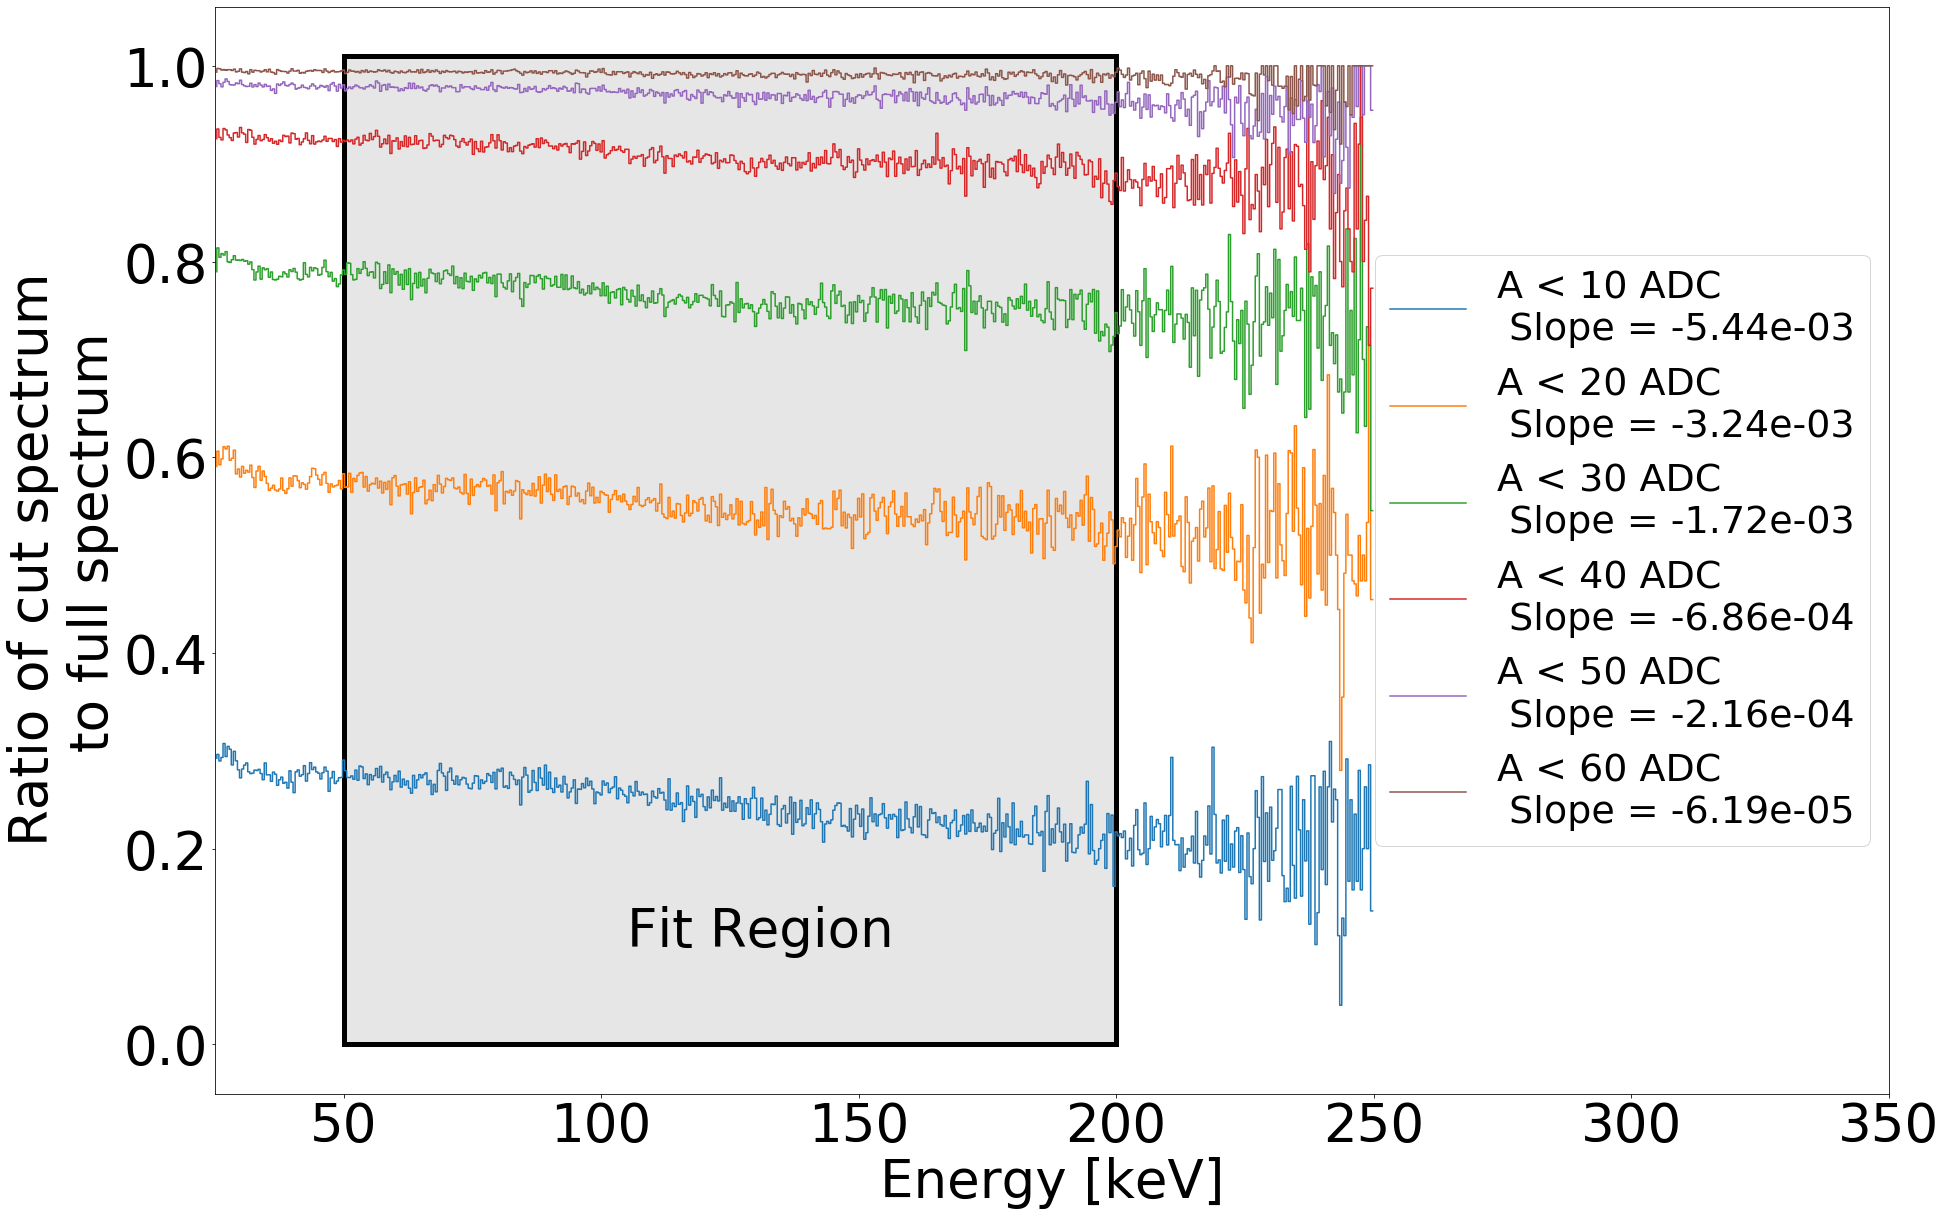

In [39]:
data=np.load('/home/noah/Desktop/large_analysis/ca_analysis/multipixel/multi_120_window-500.npy')
data=data.view(np.recarray)
data=data[data.energy>0]
meanAmps=np.sqrt(np.sum(data.osc_amps[:,0:2]**2,axis=1))

h,bins=np.histogram(data.energy,bins=1000,range=[0,400])
h[h==0]=1
h=h.astype(float)
bins=pd.cbins(bins)

beg,end=50,200
trutharray=pd.land(bins>beg,bins<end)

fig,ax=subplots(figsize=(30,20))

boxheight=1.01
ax.add_patch(Rectangle((beg,0),width=end-beg,height=boxheight,\
                       fill=True,color='0.9'))
ax.add_patch(Rectangle((beg,0),width=end-beg,height=boxheight,\
                       fill=False,linewidth=5))
ax.text(beg+(end-beg)/2-20,0.1,'Fit Region',fontsize=fs)


for amp in np.linspace(10,60,6):
    trutharray=pd.land(bins>beg,bins<end)
    hi,bi=np.histogram(data.energy[meanAmps<amp],bins=1000,range=[0,400])
    hi=hi.astype(float)
    prs,vrs=curve_fit(line,bins[trutharray],(hi/h)[trutharray],p0=[0,1],method='trf')
    m,b=prs
    vrs=np.sqrt(np.diag(vrs))
    #ax.plot(bins,hi/h,ds='steps',label='Amp < {0:1.0f} ADC\n Slope = {1:0.2e} +/- {2:0.2e}'.format(amp,m,vrs[0]))
    trutharray=pd.land(bins>25,bins<250)
    ax.plot(bins[trutharray],(hi/h)[trutharray],\
            ds='steps',label='A < {0:1.0f} ADC\n Slope = {1:0.2e}'.format(amp,m))
    #ax.plot(bins,line(bins,m,b))
ax.tick_params(labelsize=fs)
#ax.set_title('Ratio of cut to full spectrum to for given oscillation amplitude',fontsize=fs)
ax.legend(fontsize=fs-15,loc='center right')
ax.set_xlim(25,350)
#ax.set_ylim(-1,1.2)
ax.set_xlabel('Energy [keV]',fontsize=fs)
ax.set_ylabel('Ratio of cut spectrum \n to full spectrum',fontsize=fs)
show()

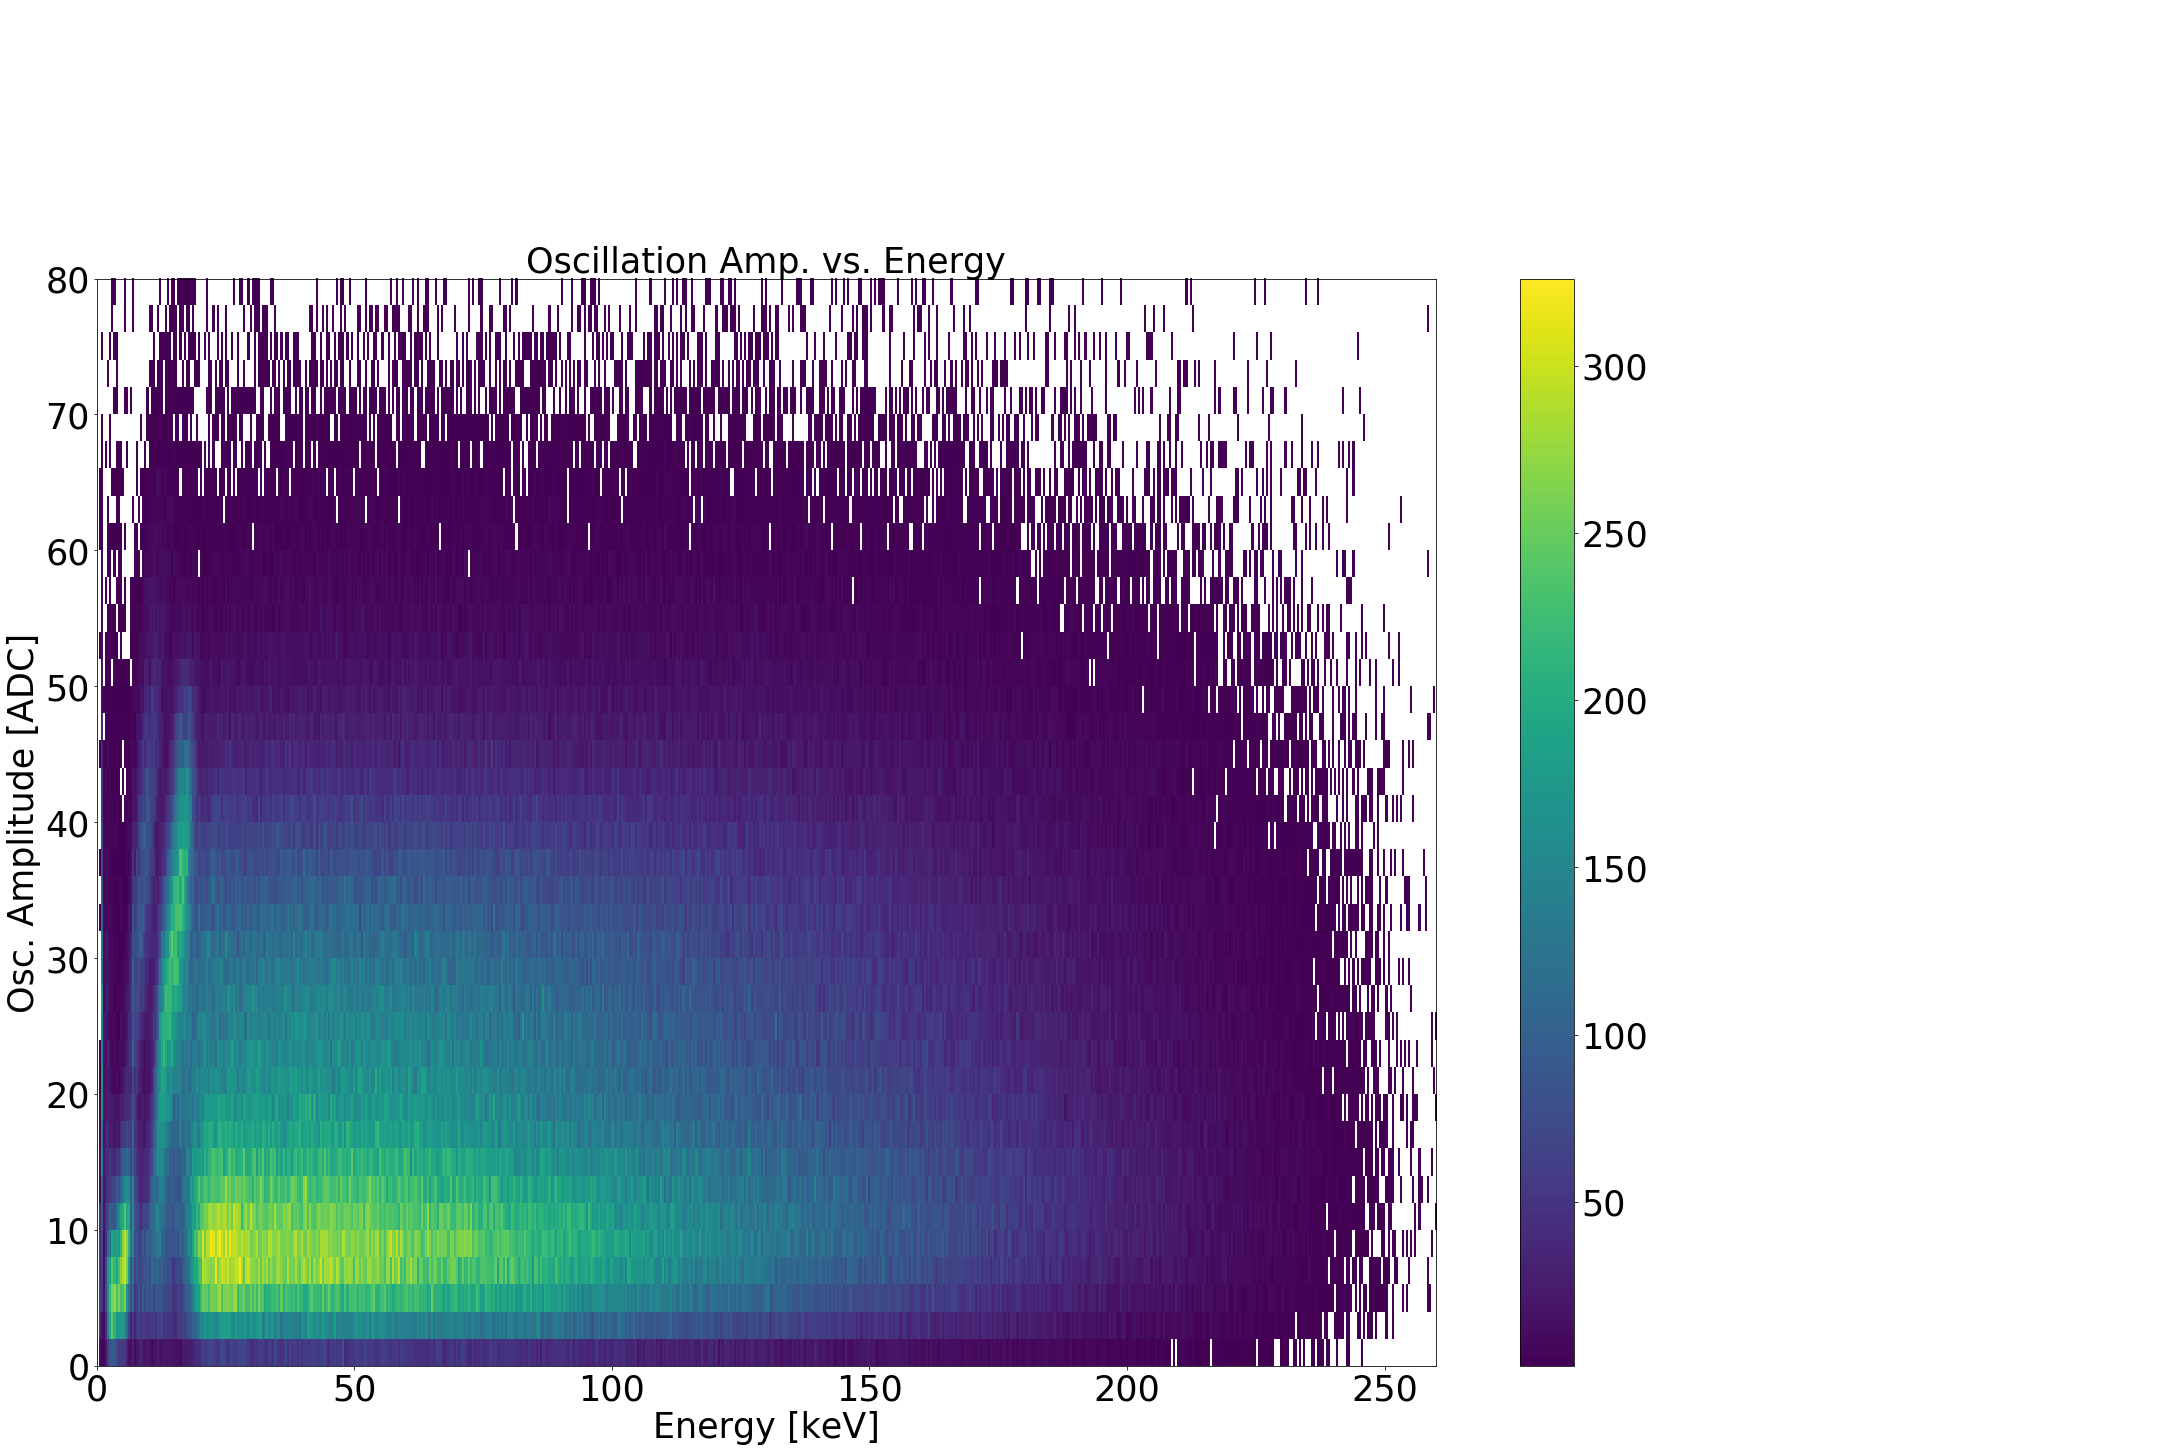

In [47]:
fig,ax=subplots(figsize=(30,20))

hist2d=ax.hist2d(data.energy,meanAmps,bins=[1000,50],range=[[0,400],[0,100]],cmap=cm.viridis,cmin=1)
ax.set_xlim(0,260)
ax.set_ylim(0,80)
cbar=colorbar(hist2d[3],ax=ax,)  
cbar.ax.tick_params(labelsize=fs)
ax.tick_params(labelsize=fs)
ax.set_ylabel('Osc. Amplitude [ADC]',fontsize=fs)
ax.set_xlabel('Energy [keV]',fontsize=fs)
ax.set_title('Oscillation Amp. vs. Energy', fontsize=fs)
savefig('2d_E_vs_oscAmp')
show()